In [1]:
#37. 頻度上位10語
#出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [2]:
import matplotlib.pyplot as plt

In [3]:
#日本語に対応
plt.rcParams['font.family'] = 'IPAPGothic'
#ファイル出力のため
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [4]:
def morpheme():
    with open('./data/neko.txt.mecab',mode='r',encoding='utf_8') as f:
        r = f.read()
    sentence = r.split('EOS')
    morp = []
    list = []
    for s in sentence:
        word = s.split('\n')
        for w in word:
            if w != '':
                surface = w.split('\t')[0]
                feature = w.split('\t')[1]
                base = feature.split(',')[6]
                pos = feature.split(',')[0]
                pos1 = feature.split(',')[1]
                d = {'surface':surface, 'base':base, 'pos':pos, 'pos1':pos1}
                list.append(d)
                #print('{s} : {b} : {p} : {p1}'.format(s=surface,b=base,p=pos,p1=pos1))
            if w == '' and len(list) != 0:
                morp.append(list)
                list = []
    return morp

In [5]:
def word_count(morp):
    count = {}
    for sentence in morp:
        for word in sentence:
            if count.get(word['surface']):
                count[word['surface']] += 1
            else:
                count[word['surface']] = 1
    #valueで降順にソート
    return sorted(count.items(),key=lambda x:x[1],reverse=True)

In [6]:
morp = morpheme()
count = word_count(morp)[:10]

In [7]:
x = []
y = []
for key,value in count:
    x.append(key)
    y.append(value)

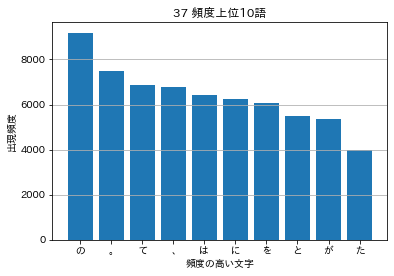

In [8]:
plt.bar(range(0,10),y)
plt.xticks(range(0,10),x)
plt.title('37 頻度上位10語')
plt.xlabel('頻度の高い文字')
plt.ylabel('出現頻度')
plt.grid(axis='y')
plt.savefig("./data/frequency37.jpg")    #このタイミングで出力
plt.show()